# [Goulib](../notebook.ipynb).image
image processing made easy



In [21]:
from PIL import Image as PILImage
from Goulib.image import Image

lena=Image('../tests/data/lena.png')
lena_bw=lena.convert("L")

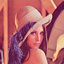

In [22]:
lena.thumbnail((64,64))  #does not alter the original image

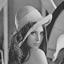

In [23]:
lena_bw.thumbnail((64,64))  #does not alter the original image

## Hashing
https://github.com/JohannesBuchner/imagehash

In [24]:
hash(lena),hash(lena_bw) #hash is independent of the image mode

(-1045967595, -1045967595)

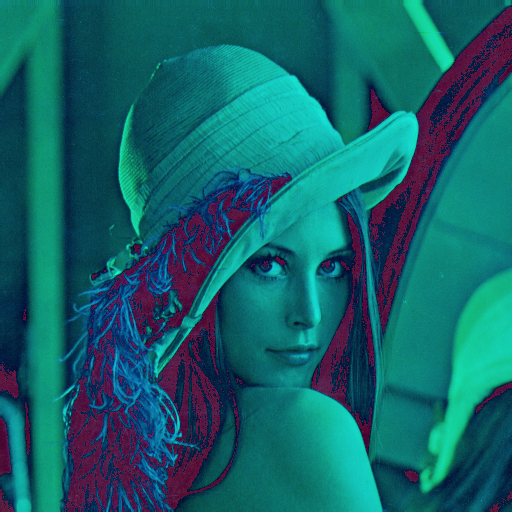

In [45]:
# split the image into individual bands
source = lena.split()

R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: 0 if i < 100 else 255)

# process the green band
out = source[G].point(lambda i: i * 0.1)

# paste the processed band back, but only where red was < 100
source[R].paste(out, None, mask)

# build a new multiband image
PILImage.merge(lena.mode, source)